In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Anmol7203/code2/main/spotify_dataset.csv")
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
max_thresold = df['Number of Times Charted'].quantile(0.95)
max_thresold

44.0

In [6]:
df[df['Number of Times Charted']>max_thresold]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
24,25,1,83,2020-06-12--2020-06-19,Blinding Lights,"15,011,809",The Weeknd,35305637,0VjIjW4GlUZAMYd2vXMi3b,"['canadian contemporary r&b', 'canadian pop', ...",2020-03-20,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,92,0.514,0.73,-5.934,0.0598,0.00146,0.0897,171.005,200040,0.334,C#/Db
34,35,4,83,2020-07-31--2020-08-07,Watermelon Sugar,"11,996,689",Harry Styles,16112621,6UelLqGlWMcVH1E5c4H7lY,"['pop', 'post-teen pop']",2019-12-13,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,90,0.548,0.816,-4.209,0.0465,0.122,0.335,95.39,174000,0.557,C
43,44,2,49,2020-11-20--2020-11-27,Dynamite,"11,196,819",BTS,37106176,4saklk6nie3yiGePpBwUoc,"['k-pop', 'k-pop boy group']",2020-11-20,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,89,0.746,0.765,-4.41,0.0993,0.0112,0.0936,114.044,199054,0.737,F#/Gb
46,47,1,51,2020-10-16--2020-10-23,Mood (feat. iann dior),"10,222,056",24kGoldn,1274433,4jPy3l0RUwlUI9T5XHBW2m,['cali rap'],2021-03-26,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,89,0.701,0.716,-3.671,0.0361,0.174,0.324,91.007,140533,0.732,G
65,66,2,83,2020-03-27--2020-04-03,Don't Start Now,"8,821,971",Dua Lipa,1250353,7njGslFmqBmOSSOpTyZCs9,[],2021-08-13,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0,0.793,0.793,-4.521,0.083,0.0123,0.0951,123.95,183290,0.679,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,568,138,49,2020-10-16--2020-10-23,Be Alright,"4,900,492",Dean Lewis,1692635,3EPXxR3ImUwfayaurPi3cm,"['australian pop', 'indie cafe pop', 'pop', 'p...",2018-06-29,2021-02-05--2021-02-12\n2021-01-29--2021-02-05...,80,0.553,0.586,-6.319,0.0362,0.697,0.0813,126.684,196373,0.443,B
611,612,66,46,2019-12-27--2020-01-03,Happier,"4,655,272","Marshmello, Bastille",31552500,2dpaYNEQHiRxtZbfNsse99,"['brostep', 'edm', 'pop', 'pop dance', 'progre...",2018-08-17,2021-01-01--2021-01-08\n2020-11-13--2020-11-20...,82,0.687,0.792,-2.749,0.0452,0.191,0.167,100.015,214290,0.671,F
616,617,27,45,2020-02-07--2020-02-14,Lose Control,"4,516,053","MEDUZA, Becky Hill, Goodboys",441714,7CHi4DtfK4heMlQaudCuHK,"['dance pop', 'edm', 'pop dance', 'pop house',...",2019-10-11,2021-01-01--2021-01-08\n2020-10-23--2020-10-30...,82,0.598,0.526,-8.659,0.0415,0.129,0.14,123.935,168387,0.529,A#/Bb
781,782,102,46,2020-04-03--2020-04-10,Get You The Moon (feat. Snøw),"4,872,409",Kina,661863,4ZLzoOkj0MPWrTLvooIuaa,['sad rap'],2018-10-08,2020-11-13--2020-11-20\n2020-11-06--2020-11-13...,82,0.498,0.235,-16.541,0.188,0.72,0.144,118.917,179080,0.0895,C#/Db


In [8]:
min_thresold = df['Number of Times Charted'].quantile(0.05)
min_thresold

1.0

In [11]:
df[df['Number of Times Charted']<min_thresold]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


In [14]:
df[(df['Number of Times Charted']<max_thresold) & (df['Number of Times Charted']>min_thresold)]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",2021-03-31,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,1537,125,2,2019-12-27--2020-01-03,"Writing on the Wall (feat. Post Malone, Cardi ...","5,229,616",French Montana,4039037,7x9nXsowok1JszkVztI5NI,"['gangster rap', 'hip hop', 'pop rap', 'rap', ...",2019-09-27,2020-01-03--2020-01-10\n2019-12-27--2020-01-03,59,0.773,0.836,-2.326,0.153,0.283,0.0828,112.01,201271,0.497,A
1537,1538,169,2,2020-01-03--2020-01-10,VALENTINO,"4,935,492",24kGoldn,1276406,6piAUJJQFD8oHDUr0b7l7q,['cali rap'],2019-11-22,2020-01-03--2020-01-10\n2019-12-27--2020-01-03,74,0.746,0.717,-4.841,0.179,0.199,0.132,150.964,179133,0.523,A
1539,1540,150,2,2019-12-27--2020-01-03,Roller,"4,732,292",Apache 207,1674348,6hw1Sy9wZ8UCxYGdpKrU6M,['german hip hop'],2019-10-25,2020-01-03--2020-01-10\n2019-12-27--2020-01-03,70,0.941,0.758,-6.47,0.17,0.0256,0.193,128.017,157093,0.683,A#/Bb
1541,1542,145,2,2019-12-27--2020-01-03,One Kiss (with Dua Lipa),"4,594,157",Calvin Harris,21946934,7ef4DlsgrMEH11cDZd32M6,"['dance pop', 'edm', 'electro house', 'house',...",2018-04-06,2020-01-03--2020-01-10\n2019-12-27--2020-01-03,81,0.791,0.862,-3.24,0.11,0.037,0.0814,123.994,214847,0.592,A


In [16]:
df.shape

(1556, 23)

In [17]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [33]:
min_thresold, max_thresold = df.Index.quantile([0.001, 0.999])
min_thresold, max_thresold

(2.5549999999999997, 1554.4450000000002)

In [34]:
df[df.Index < min_thresold]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db


In [35]:
df[df.	Index > max_thresold]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,"['pop', 'post-teen pop']",2019-11-13,2019-12-27--2020-01-03,70,0.448,0.603,-7.176,0.064,0.433,0.0862,205.272,221307,0.422,G


In [36]:
df2 = df[(df.Index<max_thresold) & (df.index>min_thresold)]
df2.shape

(1551, 23)

In [38]:
df2.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1551.000000,1551.000000,1551.000000
mean,779.000000,87.768536,10.687299
std,447.879448,57.980385,16.381920
min,4.000000,1.000000,1.000000
25%,391.500000,37.000000,1.000000
50%,779.000000,80.000000,4.000000
75%,1166.500000,136.500000,12.000000
max,1554.000000,200.000000,142.000000


In [40]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

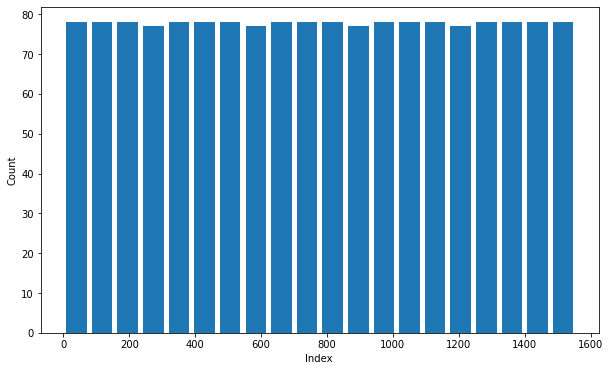

In [42]:
plt.hist(df.Index, bins=20, rwidth=0.8)
plt.xlabel('Index ')
plt.ylabel('Count')
plt.show()

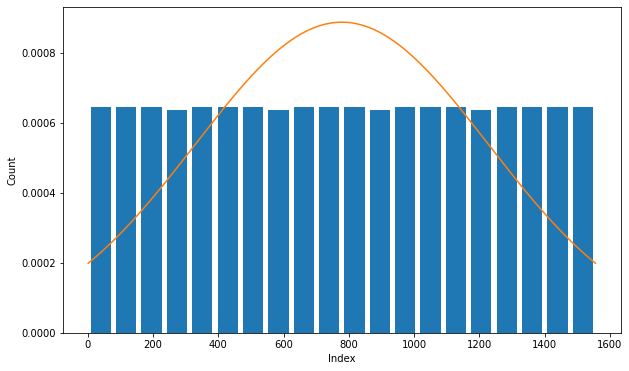

In [45]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Index, bins=20, rwidth=0.8, density=True)
plt.xlabel('Index')
plt.ylabel('Count')

rng = np.arange(df.Index.min(), df.Index.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Index.mean(),df.Index.std()))

In [47]:
df.Index.mean()

778.5

In [49]:
df.Index.std()

449.322823813792

In [50]:
upper_limit = df.Index.mean() + 3*df.Index.std()
upper_limit

2126.468471441376

In [51]:
lower_limit = df.Index.mean() -3*df.Index.std()
lower_limit

-569.4684714413761

In [52]:
df[(df.Index>upper_limit) | (df.Index<lower_limit)]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


In [53]:
df_no_outlier_std_dev = df[(df.Index<upper_limit) & (df.Index>lower_limit)]
df_no_outlier_std_dev.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [55]:
df_no_outlier_std_dev.shape

(1556, 23)

In [56]:
df.shape


(1556, 23)

In [58]:
df['zscore'] = ( df.Index - df.Index.mean() ) / df.Index.std()
df.head(5)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,zscore
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,-1.730382
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,-1.728156
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,-1.725931
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,-1.723705
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,-1.721479


In [60]:
df[df['zscore']>-2]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,zscore
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,-1.730382
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,-1.728156
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,-1.725931
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,-1.723705
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,-1.721479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A,1.721479
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B,1.723705
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D,1.725931
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F,1.728156


In [61]:
df[(df.zscore<-2) | (df.zscore>-2)]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,zscore
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,-1.730382
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,-1.728156
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,-1.725931
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,-1.723705
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,-1.721479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A,1.721479
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B,1.723705
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D,1.725931
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F,1.728156


In [62]:
df_no_outliers = df[(df.zscore>-2) & (df.zscore-23)]
df_no_outliers.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,zscore
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,-1.730382
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,-1.728156
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,-1.725931
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,-1.723705
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,-1.721479


In [64]:
df_no_outliers.shape

(1556, 24)

In [66]:
df.shape

(1556, 24)

In [67]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted,zscore
count,1556.000000,1556.000000,1556.000000,1.556000e+03
mean,778.500000,87.744216,10.668380,-5.279981e-18
std,449.322824,58.147225,16.360546,1.000000e+00
min,1.000000,1.000000,1.000000,-1.730382e+00
25%,389.750000,37.000000,1.000000,-8.651909e-01
50%,778.500000,80.000000,4.000000,0.000000e+00
75%,1167.250000,137.000000,12.000000,8.651909e-01
max,1556.000000,200.000000,142.000000,1.730382e+00


In [74]:
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Danceability'] = pd.to_numeric(df['Danceability'], errors='coerce')
df['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')
df['Loudness'] = pd.to_numeric(df['Loudness'], errors='coerce')
df['Tempo'] = pd.to_numeric(df['Tempo'], errors='coerce')
df['Liveness'] = pd.to_numeric(df['Liveness'], errors='coerce')
df['Artist Followers'] = pd.to_numeric(df['Artist Followers'], errors='coerce')

In [76]:
Q1 = df.Popularity.quantile(0.25)
Q3 = df.Popularity.quantile(0.75)
Q1, Q3

(65.0, 80.0)

In [78]:
IQR = Q3 - Q1
IQR

15.0

In [79]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(42.5, 102.5)

In [80]:
df[(df.Popularity<lower_limit)|(df.Popularity>upper_limit)]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,zscore
65,66,2,83,2020-03-27--2020-04-03,Don't Start Now,NaN,Dua Lipa,1250353.0,7njGslFmqBmOSSOpTyZCs9,[],2021-08-13,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.0,0.793,0.793,-4.521,0.083,0.0123,0.0951,123.950,183290,0.679,B,-1.585720
83,84,76,3,2020-03-27--2020-04-03,Love Again,NaN,Dua Lipa,1250353.0,2sN1pMv6d2t5GlvN6IBMlK,[],2021-08-13,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.0,0.659,0.667,-4.668,0.0339,0.00173,0.1000,115.982,258004,0.468,B,-1.545659
95,96,96,4,2021-07-23--2021-07-30,In Da Getto,NaN,"J Balvin, Skrillex",1250353.0,5lGtPshEJlsJgmqKLi41LY,[],2021-08-12,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,2.0,0.915,0.720,-3.126,0.0459,0.025,0.0942,126.986,131067,0.631,G#/Ab,-1.518952
118,119,5,21,2021-03-19--2021-03-26,Hold On,NaN,Justin Bieber,1250353.0,49xx65gvlD7xXjDTavFqaJ,[],2021-08-13,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.0,0.658,0.634,-5.797,0.0413,0.0106,0.1320,139.980,170813,0.29,C#/Db,-1.467764
156,157,68,6,2021-07-02--2021-07-09,Ramenez la coupe à la maison,NaN,Vegedream,1250353.0,0dqVP9CnGjaYNjya3gYbYy,[],2021-08-13,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.0,0.808,0.660,-6.237,0.0395,0.0358,0.1380,107.994,235556,0.804,C,-1.383193
164,165,13,83,2020-01-24--2020-01-31,bad guy,NaN,Billie Eilish,1250353.0,1hewNsVmijBqjKvFRQfk4m,[],2021-08-13,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0.0,0.701,0.425,-10.965,0.375,0.328,0.1000,135.128,194088,0.562,G,-1.365388
215,216,15,7,2021-06-04--2021-06-11,Lost Cause,NaN,Billie Eilish,1250353.0,36fhyo5QlxBW7DrDHIOn1G,[],2021-08-12,2021-07-16--2021-07-23\n2021-07-09--2021-07-16...,0.0,0.671,0.336,-8.494,0.241,0.705,0.0577,75.051,212496,0.518,A#/Bb,-1.251884
285,286,6,26,2021-01-01--2021-01-08,Anyone,NaN,Justin Bieber,1250353.0,2RwMwWo43LapkA4raptxaB,[],2021-08-13,2021-06-18--2021-06-25\n2021-06-11--2021-06-18...,0.0,0.686,0.538,-8.026,0.0345,0.181,0.1130,115.884,190779,0.584,D,-1.096094
308,309,2,31,2020-11-13--2020-11-20,Therefore I Am,NaN,Billie Eilish,1250353.0,0aACcc1jEv2C6VSmmJbllJ,[],2021-08-13,2021-06-11--2021-06-18\n2021-06-04--2021-06-11...,0.0,0.889,0.340,-7.773,0.0697,0.218,0.0550,94.009,174321,0.716,B,-1.044906
311,312,39,6,2021-05-07--2021-05-14,Higher Power,NaN,Coldplay,1250353.0,4rOEoKL0fHrxBMhVljpbGW,[],2021-08-13,2021-06-11--2021-06-18\n2021-06-04--2021-06-11...,0.0,0.507,0.828,-6.023,0.0449,0.00711,0.2610,178.032,211295,0.489,A#/Bb,-1.038229


In [82]:
df_no_outlier = df[(df.Popularity>lower_limit)&(df.Popularity<upper_limit)]
df_no_outlier

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,zscore
0,1,1,8,2021-07-23--2021-07-30,Beggin',NaN,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100.0,0.714,0.800,-4.808,0.0504,0.127,0.3590,134.002,211560,0.589,B,-1.730382
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),NaN,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db,-1.728156
2,3,1,11,2021-06-25--2021-07-02,good 4 u,NaN,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99.0,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,-1.725931
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,NaN,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B,-1.723705
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),NaN,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,-1.721479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,NaN,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A,1.721479
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,NaN,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66.0,0.528,0.870,-3.123,0.0851,0.24,0.3330,152.370,181930,0.714,B,1.723705
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),NaN,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81.0,0.765,0.523,-4.333,0.03,0.184,0.1320,104.988,217307,0.394,D,1.725931
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,NaN,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60.0,0.832,0.550,-7.026,0.0587,0.249,0.1820,154.064,152784,0.881,F,1.728156
